In [ ]:
#libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense

import keras.backend as K
from keras.callbacks import EarlyStopping
#from Keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from google.colab import files
#uploaded=files.upload()

In [ ]:
#Get the Dataset

df=pd.read_csv('')
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [ ]:
print("shape: ",df.shape)
print('null: ',df.isnull().values.any())

shape:  (2991, 10)
null:  False


In [ ]:
df.index_col='Date'

In [ ]:
df.parse_dates=True
df.infer_datetime_format=True

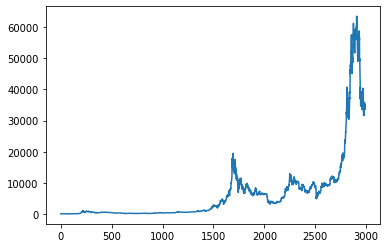

In [ ]:
#plotting the actual price with time
df['Close'].plot()

In [ ]:

#Setting the Variables
output_var = pd.DataFrame(df['Open'])

features = ['Open', 'High', 'Low','Marketcap', 'Volume']

In [ ]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Marketcap,Volume
0,0.001039,0.001126,0.001102,0.000696,0.0
1,0.001190,0.001117,0.001103,0.000645,0.0
2,0.001111,0.001008,0.000679,0.000439,0.0
3,0.000754,0.000788,0.000431,0.000329,0.0
4,0.000595,0.000518,0.000218,0.000259,0.0


In [ ]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
import tensorflow as tf

In [ ]:
import keras

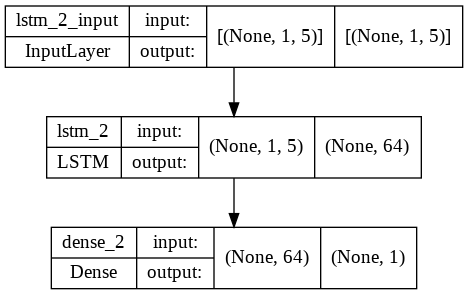

In [ ]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(64, input_shape=(1, trainX.shape[1]),activation='relu', return_sequences=False))
#relu activtion removed
lstm.add(Dense(1))
opt=tf.keras.optimizers.Adam(0.1)
lstm.compile(loss='mean_squared_error', optimizer=opt)
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras import callbacks
CallBacks=[callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=10,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0,
),
callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
),
callbacks.ModelCheckpoint(
    "modelV1.h5",
    monitor="val_loss",
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    options=None,
    initial_value_threshold=None
),
]

In [ ]:
# #Model Training
# history=lstm.fit(X_train, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False)

In [ ]:
history=lstm.fit(X_train, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False)

Epoch 1/200
340/340 [==============================] - 2s 2ms/step - loss: 1728867.3750
Epoch 2/200
340/340 [==============================] - 1s 2ms/step - loss: 2831134.7500
Epoch 3/200
340/340 [==============================] - 1s 2ms/step - loss: 779125.1250
Epoch 4/200
340/340 [==============================] - 1s 2ms/step - loss: 233799.7344
Epoch 5/200
340/340 [==============================] - 1s 2ms/step - loss: 89922.2578
Epoch 6/200
340/340 [==============================] - 1s 2ms/step - loss: 73744.4297
Epoch 7/200
340/340 [==============================] - 1s 2ms/step - loss: 79739.8906
Epoch 8/200
340/340 [==============================] - 1s 2ms/step - loss: 109451.9375
Epoch 9/200
340/340 [==============================] - 1s 2ms/step - loss: 77881.7266
Epoch 10/200
340/340 [==============================] - 1s 2ms/step - loss: 79658.1016
Epoch 11/200
340/340 [==============================] - 1s 2ms/step - loss: 157284.3281
Epoch 12/200
340/340 [======================

In [ ]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
340/340 [==============================] - 1s 2ms/step - loss: 20539.1699
Epoch 2/100
340/340 [==============================] - 1s 2ms/step - loss: 20500.9590
Epoch 3/100
340/340 [==============================] - 1s 2ms/step - loss: 20462.9395
Epoch 4/100
340/340 [==============================] - 1s 2ms/step - loss: 20425.0918
Epoch 5/100
340/340 [==============================] - 1s 2ms/step - loss: 20387.4629
Epoch 6/100
340/340 [==============================] - 1s 2ms/step - loss: 20349.9844
Epoch 7/100
340/340 [==============================] - 1s 2ms/step - loss: 20312.7168
Epoch 8/100
340/340 [==============================] - 1s 2ms/step - loss: 20275.6289
Epoch 9/100
340/340 [==============================] - 1s 2ms/step - loss: 20238.7266
Epoch 10/100
340/340 [==============================] - 1s 2ms/step - loss: 20202.0332
Epoch 11/100
340/340 [==============================] - 1s 2ms/step - loss: 20165.5488
Epoch 12/100
340/340 [==============================

In [ ]:
history=lstm.fit(X_train, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False)

Epoch 1/200
340/340 [==============================] - 2s 5ms/step - loss: 17715.3242
Epoch 2/200
340/340 [==============================] - 2s 5ms/step - loss: 17694.7988
Epoch 3/200
340/340 [==============================] - 1s 4ms/step - loss: 17674.3477
Epoch 4/200
340/340 [==============================] - 1s 2ms/step - loss: 17653.9902
Epoch 5/200
340/340 [==============================] - 1s 2ms/step - loss: 17633.6895
Epoch 6/200
340/340 [==============================] - 1s 2ms/step - loss: 17613.4902
Epoch 7/200
340/340 [==============================] - 1s 2ms/step - loss: 17593.3652
Epoch 8/200
340/340 [==============================] - 1s 2ms/step - loss: 17573.3184
Epoch 9/200
340/340 [==============================] - 1s 2ms/step - loss: 17553.3535
Epoch 10/200
340/340 [==============================] - 1s 2ms/step - loss: 17533.4766
Epoch 11/200
340/340 [==============================] - 1s 2ms/step - loss: 17513.6562
Epoch 12/200
340/340 [==============================

In [ ]:
history=lstm.fit(X_train, y_train, epochs=500, batch_size=16, verbose=1, shuffle=False)

Epoch 1/500
170/170 [==============================] - 4s 6ms/step - loss: 14328069.0000
Epoch 2/500
170/170 [==============================] - 1s 4ms/step - loss: 14121321.0000
Epoch 3/500
170/170 [==============================] - 1s 3ms/step - loss: 13917684.0000
Epoch 4/500
170/170 [==============================] - 1s 3ms/step - loss: 13717650.0000
Epoch 5/500
170/170 [==============================] - 1s 3ms/step - loss: 13520271.0000
Epoch 6/500
170/170 [==============================] - 1s 3ms/step - loss: 13326196.0000
Epoch 7/500
170/170 [==============================] - 1s 4ms/step - loss: 13134816.0000
Epoch 8/500
170/170 [==============================] - 1s 3ms/step - loss: 12946256.0000
Epoch 9/500
170/170 [==============================] - 1s 3ms/step - loss: 12760311.0000
Epoch 10/500
170/170 [==============================] - 1s 3ms/step - loss: 12576945.0000
Epoch 11/500
170/170 [==============================] - 1s 3ms/step - loss: 12396061.0000
Epoch 12/500
170/17

In [ ]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

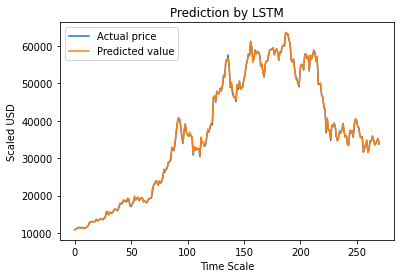

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='Actual price')
plt.plot(y_pred, label='Predicted value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()